## Build a Bear Workshops vs the S&P 500

While scrolling on social media recently, I came across a post with a surprising assertion. Build a Bear Workshop Inc. consistently outerperforms leading tech and AI companies in the S&P 500, including giants such as Nvidia and Palantir.

This project aims to examine the accuracy of that assertion and explore the underlying factors that may explain such performance.

-----

In [147]:
import matplotlib.pyplot as plt 
import pandas as pd 
import yfinance as yf

The companies that will be used in the initial analysis are tech & AI giants **Nvidia, Palantir, Meta, Alphabet and Microsoft.**

- **Nvidia** and **Palantir** are fast growing stocks that have soared astronmically as a result of AI hype.
- In comparison, **Microsoft**, **Meta**, and **Alphabet** are all well established in the tech industry. 



In [ ]:
tickers = ['BBW', 'NVDA', 'PLTR', 'META', 'GOOG', 'MSFT']

# 5 years of closing data for each ticker
stock_data = yf.download(tickers, start= "2020-09-30", end = None, auto_adjust= True)["Close"] # start date is palantir's IPO date
clean_data = stock_data.dropna() # remove empty tables

#stock_data.head()  # previewing data for testing

[*********************100%***********************]  6 of 6 completed


Ticker,BBW,GOOG,META,MSFT,NVDA,PLTR
Date,,,,,,
2020-09-30,2.129917,72.980576,260.471008,201.669739,13.489325,9.50
2020-10-01,2.351428,73.998116,265.175232,203.712036,13.573067,9.46
2020-10-02,2.342909,72.425369,258.521729,197.700195,13.022496,9.20
2020-10-05,2.394027,73.796005,263.206024,201.717712,13.600980,9.03
2020-10-06,2.368468,72.178062,257.248718,197.431763,13.694695,9.90


### Normalizing and Visualizing Stock Prices 
Obviously, the price of Build a Bear stock is not comparable to the stock of Microsoft. To account for this, we need to normalize each stock so that they all start at a baseline of 100 on the same start date.

This sets a reference point to compare and visualize relative performance. 

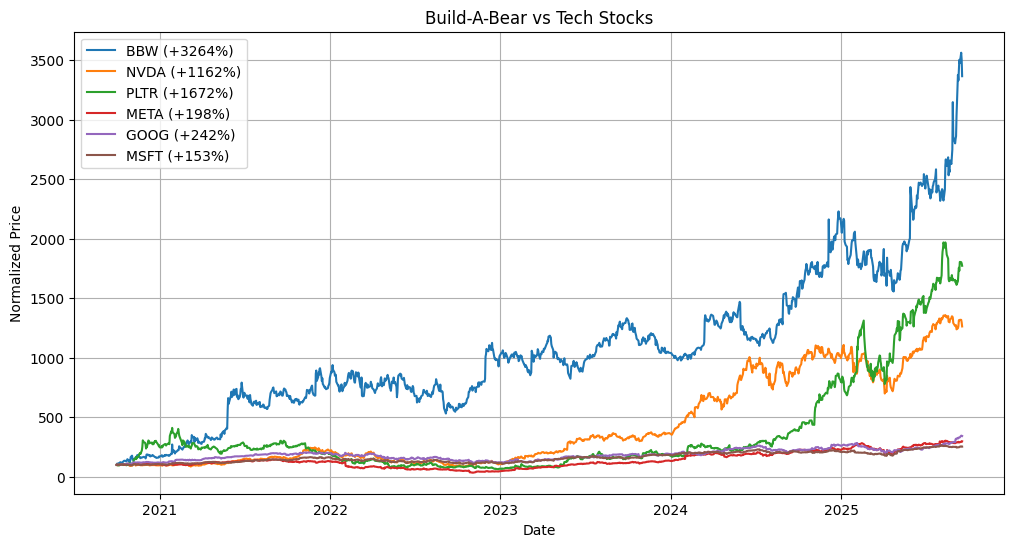

     Starting   Ending  Return %
BBW     $2.13   $71.65  +3264.0%
NVDA   $13.49  $170.29  +1162.4%
PLTR    $9.50  $168.33  +1671.9%
META  $260.47  $775.72   +197.8%
GOOG   $72.98  $249.85   +242.4%
MSFT  $201.67  $510.02   +152.9%


In [ ]:
normalized = (clean_data/ clean_data.iloc[0]) * 100 # Explanation
returns = (clean_data.iloc[-1] / clean_data.iloc[0] - 1) * 100 # Explanation

plt.figure(figsize=(12,6))

for ticker in tickers:
   plt.plot(normalized[ticker], label = f"{ticker} ({returns[ticker]:+.0f}%)")

plt.title("Build-A-Bear Workshops vs Tech Stocks")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

# Percentages for testing
#print("Total Returns Since 2020-09-30:\n")
#for ticker, ret in returns.items(): 
  #  print(f"{ticker}: {ret:.2f}%") 

summary_data = {
    'Starting': [f"${clean_data[ticker].iloc[0]:.2f}" for ticker in tickers],
    'Ending': [f"${clean_data[ticker].iloc[-1]:.2f}" for ticker in tickers],
    'Return %': [f"{returns[ticker]:+.1f}%" for ticker in tickers]}

summary_df = pd.DataFrame(summary_data, index = tickers)
print(summary_df)

This code 